# Dalip data analysis

## Stack Overflow data analysis

In [82]:
import os

import pandas as pd
import seaborn as sns

In [84]:
so_df = pd.read_csv('data/dalip_stackoverflow/stackoverflow_1_50000.csv')

In [85]:
so_df.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,RowNum
0,4,1,7.0,NaN,2008-07-31 21:42:52,117,8739.0,"<p>I'm new to C#, and I want to use a track-ba...",8.0,NaN,...,2012-02-26 13:46:05,2012-03-06 08:07:53,When setting a form's opacity should I use a d...,<c#><winforms><forms><opacity>,12.0,16.0,13.0,NaN,NaN,1
1,6,1,31.0,NaN,2008-07-31 22:08:08,33,2761.0,<p>I have an absolutely positioned <code>div</...,9.0,NaN,...,2012-02-26 13:47:20,2012-02-26 13:47:20,Why doesn't the percentage width child in abso...,<html><css><css3><internet-explorer-7>,5.0,5.0,2.0,NaN,NaN,2
2,7,2,NaN,4.0,2008-07-31 22:17:57,111,NaN,<p>An explicit cast to double isn't necessary....,9.0,NaN,...,2010-02-02 19:38:14,2010-02-02 19:38:14,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3
3,8,1,162.0,NaN,2008-07-31 23:33:19,17,1405.0,<p>Are there any conversion tools for porting ...,9.0,NaN,...,2012-02-26 13:49:17,2012-02-26 13:49:17,Are there any conversion tools for porting Vis...,<c#><j#><visualj#>,3.0,0.0,1.0,NaN,NaN,4
4,9,1,1404.0,NaN,2008-07-31 23:40:59,272,74315.0,<p>Given a <code>DateTime</code> representing ...,1.0,NaN,...,2012-02-26 13:50:29,2012-02-26 13:50:29,How do I calculate someone's age in C#?,<c#><.net><math><datetime>,31.0,5.0,132.0,NaN,2011-08-16 19:40:43,5


In [15]:
so_df['PostTypeId'].value_counts()

2    41100
1     8900
Name: PostTypeId, dtype: int64

In [13]:
so_df['PostTypeId'].value_counts(normalize=True)

2    0.822
1    0.178
Name: PostTypeId, dtype: float64

In [33]:
so_df['ParentId'].describe()

count     41100.000000
mean      34584.406886
std       22898.676696
min           4.000000
25%       16074.000000
50%       34396.500000
75%       52598.000000
max      654275.000000
Name: ParentId, dtype: float64

In [38]:
so_df['ParentId'].quantile(0.95)

66164.04999999999

<AxesSubplot:>

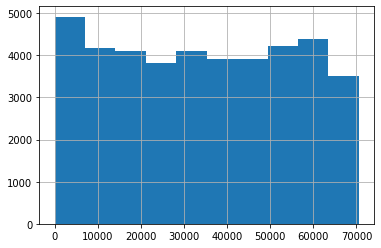

In [42]:
so_df['ParentId'].loc[lambda x: x < 100000].hist()

<AxesSubplot:xlabel='ParentId'>

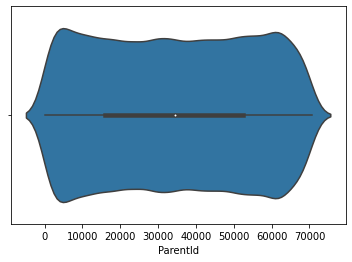

In [46]:
sns.violinplot(data=so_df[so_df['ParentId'] < 100000], x='ParentId')

### Numeric columns only

In [85]:
from src.utils import get_all_csv_files
import pandas as pd
from tqdm import tqdm

In [93]:
csv_files = get_all_csv_files('data/dalip_stackoverflow')

so_numeric = []
for file in tqdm(csv_files):
    so_data = pd.read_csv(file)
    so_numeric.append(so_data.select_dtypes(exclude=['object']))
so_numeric_df = pd.concat(so_numeric)

 92%|█████████▏| 159/172 [01:22<00:07,  1.86it/s]<ipython-input-93-723a16981bbd>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
 95%|█████████▌| 164/172 [01:25<00:04,  1.77it/s]<ipython-input-93-723a16981bbd>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
 97%|█████████▋| 166/172 [01:26<00:03,  1.78it/s]<ipython-input-93-723a16981bbd>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
100%|██████████| 172/172 [01:29<00:00,  1.92it/s]


In [95]:
so_numeric_df.to_csv('data/dalip_stackoverflow_samples/dalip_stackoverflow_numeric.csv', index=False)

### User scores

In [75]:
import pandas as pd

In [76]:
so_numeric_df = pd.read_csv('data/dalip_stackoverflow_samples/dalip_stackoverflow_numeric.csv')

In [77]:
so_numeric_df['Score'].describe()

count    8.575280e+06
mean     1.702098e+00
std      6.154922e+00
min     -1.660000e+02
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.435000e+03
Name: Score, dtype: float64

### Answers number 

In [1]:
from src.utils.file_io import get_all_csv_files
import pandas as pd
from tqdm import tqdm

In [5]:
csv_files = get_all_csv_files('data')

parent_counts = pd.Series(dtype=int)
post_type_counts = pd.Series(dtype=int)
for file in tqdm(csv_files):
    so_data = pd.read_csv(file)
    parent_counts = parent_counts.add(so_data['ParentId'].value_counts(), fill_value=0)
    post_type_counts = post_type_counts.add(so_data['PostTypeId'].value_counts(), fill_value=0)

 92%|█████████▏| 159/172 [01:57<00:13,  1.02s/it]<ipython-input-5-248317d4dbba>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
 95%|█████████▌| 164/172 [02:02<00:08,  1.05s/it]<ipython-input-5-248317d4dbba>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
 97%|█████████▋| 166/172 [02:05<00:06,  1.07s/it]<ipython-input-5-248317d4dbba>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
100%|██████████| 172/172 [02:11<00:00,  1.31it/s]


In [8]:
len(parent_counts)

2558752

In [7]:
post_type_counts

1    2785896.0
2    5769773.0
3        167.0
4       9662.0
5       9662.0
6        119.0
7          1.0
dtype: float64

In [17]:
(parent_counts >= 4).value_counts()

False    2163093
True      395659
dtype: int64

## Dalip dataset

### Dataset recreation

In [46]:
import pandas as pd
import numpy as np

In [19]:
dalip_results = pd.read_csv('data/dalip_stackoverflow_results/MV_results_stack.txt')

In [82]:
dalip_results['fold'].value_counts()

3    10803
4    10728
1    10662
0    10563
2    10507
Name: fold, dtype: int64

In [66]:
dalip_post_ids = np.hstack([dalip_results['id'], dalip_results['qid'].unique()])
dalip_post_ids = pd.DataFrame({'Id': dalip_post_ids})

In [76]:
csv_files = get_all_csv_files('data/dalip_stackoverflow')

dalip_dataset = []
for file in tqdm(csv_files):
    so_data = pd.read_csv(file)
    dalip_dataset.append(so_data.merge(dalip_post_ids, on='Id'))
dalip_dataset_df = pd.concat(dalip_dataset)

 92%|█████████▏| 159/172 [01:27<00:08,  1.62it/s]<ipython-input-76-d47b64a1e4d2>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
 95%|█████████▌| 164/172 [01:30<00:04,  1.65it/s]<ipython-input-76-d47b64a1e4d2>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
 97%|█████████▋| 166/172 [01:32<00:03,  1.61it/s]<ipython-input-76-d47b64a1e4d2>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  so_data = pd.read_csv(file)
100%|██████████| 172/172 [01:35<00:00,  1.81it/s]


In [77]:
dalip_dataset_df.to_csv('data/dalip_stackoverflow_dataset/dalip_stackoverflow_dataset.csv', index=False)

### Huggingface dataset creation

In [1]:
import pandas as pd
from src.utils.config_management import CONFIG
from src.data_management import dalip_dataset_to_huggingface

In [2]:
dalip_dataset_df = pd.read_csv(CONFIG['paths']['data']['dalip_stackoverflow_dataset'])

In [3]:
results_df = pd.read_csv(CONFIG['paths']['data']['dalip_stackoverflow_mv_feat_mv_results'])
test_question_ids = results_df[results_df['fold'] == 0]['qid'].unique()

In [5]:
results_df[results_df['fold'] == 0].to_csv('fold_0.csv', index=False)

In [4]:
hf_dataset = dalip_dataset_to_huggingface(dalip_dataset_df, test_question_ids=test_question_ids)

Casting the dataset:   0%|          | 0/42700 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/10563 [00:00<?, ? examples/s]

In [5]:
len(hf_dataset['train']) + len(hf_dataset['test'])

53263

In [6]:
hf_dataset.save_to_disk(CONFIG['paths']['data']['dalip_hf_dataset'])

Saving the dataset (0/1 shards):   0%|          | 0/42700 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10563 [00:00<?, ? examples/s]

In [7]:
hf_dataset['test'].to_csv('hf_dataset_test.csv')

Creating CSV from Arrow format:   0%|          | 0/11 [00:00<?, ?ba/s]

19037700

In [8]:
pd.Series(hf_dataset['test']['question_id']).isin(test_question_ids).value_counts()

True    10563
dtype: int64

### Dataset analysis

In [1]:
import pandas as pd
from src.utils.config_management import CONFIG
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
dalip_dataset_df = pd.read_csv(CONFIG['paths']['data']['dalip_stackoverflow_dataset'])

#### Answer scores distribution

In [4]:
answer_scores = dalip_dataset_df[dalip_dataset_df['PostTypeId'] == 2]['Score']
answer_normalized_scores = answer_scores - answer_scores.min()

In [19]:
31656 / len(answer_scores)

0.5943337776693014

In [17]:
answer_scores[answer_scores.isin([0, 1])]

0        0
1        1
3        1
6        1
8        1
        ..
62971    1
62975    0
62976    0
62979    0
62982    1
Name: Score, Length: 31656, dtype: int64

In [5]:
answer_scores.describe()

count    53263.000000
mean         2.497099
std          7.808388
min        -16.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        505.000000
Name: Score, dtype: float64

<AxesSubplot:>

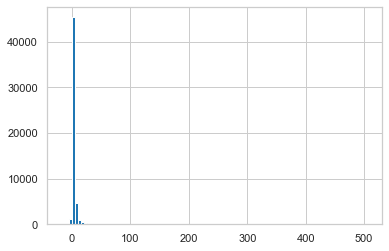

In [6]:
answer_scores.hist(bins=100)

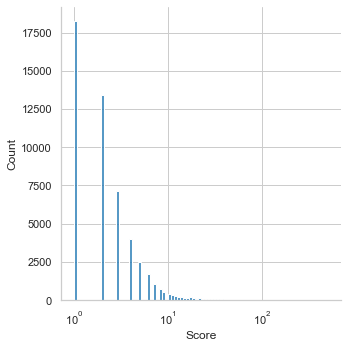

In [27]:
plot = sns.displot(answer_scores[answer_scores >= 0] + 1, log_scale=True)
plot.savefig('outputs/images/answer_scores.pdf')

In [22]:
answer_normalized_scores.describe()

count    53263.000000
mean        18.497099
std          7.808388
min          0.000000
25%         16.000000
50%         17.000000
75%         19.000000
max        521.000000
Name: Score, dtype: float64

In [20]:
answer_log_normalized_scores = np.log1p(answer_normalized_scores)

<AxesSubplot:>

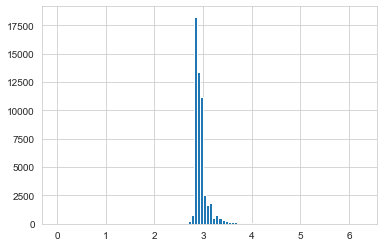

In [21]:
answer_log_normalized_scores.hist(bins=100)

#### What is the rank of the accepted answers?

In [4]:
import datasets

In [5]:
hf_dataset = datasets.load_from_disk(CONFIG['paths']['data']['dalip_hf_dataset'])

In [15]:
dataset_df = pd.concat([hf_dataset['train'].to_pandas(), hf_dataset['test'].to_pandas()])

In [24]:
dataset_df['answer_rank'] = dataset_df.groupby('question_id')['answer_score'].rank(method='average', ascending=False)

<AxesSubplot:>

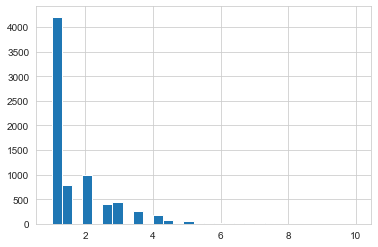

In [32]:
dataset_df[dataset_df['answer_accepted'] == True]['answer_rank'].hist(bins=30)

In [28]:
dataset_df[dataset_df['answer_accepted'] == True]['answer_rank'].value_counts(normalize=True)

1.0     0.561891
2.0     0.133129
1.5     0.104019
3.0     0.059688
2.5     0.053278
3.5     0.035252
4.0     0.024169
4.5     0.011350
5.0     0.006944
6.0     0.002938
5.5     0.002537
6.5     0.001869
7.0     0.001602
9.0     0.000401
7.5     0.000267
8.0     0.000267
8.5     0.000134
9.5     0.000134
10.0    0.000134
Name: answer_rank, dtype: float64

#### How many questions have answers with uniform scores?

In [61]:
unique_answer_score_counts = dalip_dataset_df[dalip_dataset_df['PostTypeId'] == 2].groupby('ParentId')[
    'Score'].nunique().reset_index(name='unique_answer_score_count')
uniform_questions = unique_answer_score_counts['ParentId'][unique_answer_score_counts['unique_answer_score_count'] == 1]
len(uniform_questions)

75

#### What answer scores are uniform?

In [77]:
dalip_dataset_df[dalip_dataset_df['ParentId'].isin(uniform_questions)].groupby('ParentId')['Score'].unique().value_counts()

[1]    72
[2]     3
Name: Score, dtype: int64

In [20]:
dalip_dataset_df[dalip_dataset_df['PostTypeId'] == 2]['Title'].isna().value_counts()

True    53263
Name: Title, dtype: int64

In [19]:
dalip_dataset_df.groupby('PostTypeId').apply(lambda x: x.notna().sum())

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,RowNum
PostTypeId,,,,,,,,,,,,,,,,,,,,,
1,9721,9721,7489,0,9721,9721,9721,9721,9414,1531,...,5647,9721,9721,9721,9721,5759,4475,294,174,9721
2,53263,53263,0,53263,53263,53263,0,53263,52454,8699,...,11299,53263,0,1,0,22349,0,0,1928,53263


#### Number of answers per question

In [23]:
dalip_dataset_df['ParentId'].value_counts().describe()

count    9721.000000
mean        5.479169
std         3.068793
min         4.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        92.000000
Name: ParentId, dtype: float64

In [24]:
dalip_dataset_df['ParentId'].value_counts().quantile(0.95)

10.0

#### Tokenized dataset analysis

In [1]:
from datasets import load_from_disk, concatenate_datasets
from transformers import PreTrainedTokenizerFast
from src.utils.text_preprocessing import Preprocessor
from src.utils.config_management import CONFIG
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [9]:
hf_dataset = load_from_disk(CONFIG['paths']['data']['dalip_hf_dataset'])
full_hf_dataset = concatenate_datasets([hf_dataset['train'], hf_dataset['test']])

In [74]:
train_df = pd.DataFrame(hf_dataset['train'])
test_df = pd.DataFrame(hf_dataset['test'])

In [79]:
len(test_df)

10563

In [10]:
preprocessor = Preprocessor(preserve_html_tags=['code'])

In [11]:
full_hf_dataset = full_hf_dataset.map(preprocessor, batched=True)

In [12]:
full_hf_dataset_df = pd.DataFrame(full_hf_dataset)

In [13]:
tokenizer = PreTrainedTokenizerFast.from_pretrained('mmukh/SOBertBase')

In [14]:
full_hf_dataset_df['tokenized_question_text'] = full_hf_dataset_df['question_text'].apply(lambda x: tokenizer(x)['input_ids'])
full_hf_dataset_df['tokenized_answer_text'] = full_hf_dataset_df['answer_text'].apply(lambda x: tokenizer(x)['input_ids'])

Token indices sequence length is longer than the specified maximum sequence length for this model (2103 > 2048). Running this sequence through the model will result in indexing errors


In [15]:
full_hf_dataset_df['tokenized_question_text_len'] = full_hf_dataset_df['tokenized_question_text'].apply(len)
full_hf_dataset_df['tokenized_answer_text_len'] = full_hf_dataset_df['tokenized_answer_text'].apply(len)

full_hf_dataset_df['answer_question_len_delta'] = full_hf_dataset_df['tokenized_answer_text_len'] - \
                                                  full_hf_dataset_df['tokenized_question_text_len']

MAX_LENGTH = 1024
full_hf_dataset_df['question_text_len_extra'] = full_hf_dataset_df['tokenized_question_text_len'].apply(
    lambda x: max(0, x - MAX_LENGTH))
full_hf_dataset_df['answer_text_len_extra'] = full_hf_dataset_df['tokenized_answer_text_len'].apply(
    lambda x: max(0, x - MAX_LENGTH))

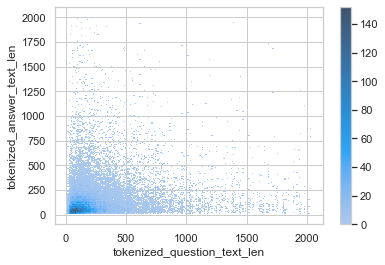

In [62]:
ax = sns.histplot(data=full_hf_dataset_df[(full_hf_dataset_df['tokenized_question_text_len'] <= 2048) &
                                     (full_hf_dataset_df['tokenized_answer_text_len'] <= 2048)],
             x='tokenized_question_text_len', y='tokenized_answer_text_len',
             cbar=True)
ax.get_figure().savefig('outputs/images/tokenized_qa_len.pdf')

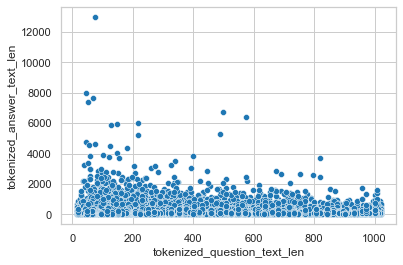

In [25]:
plot = sns.scatterplot(data=full_hf_dataset_df[full_hf_dataset_df['tokenized_question_text_len'] <= 1024],
                x='tokenized_question_text_len', y='tokenized_answer_text_len')

<AxesSubplot:xlabel='tokenized_question_text_len', ylabel='answer_question_len_delta'>

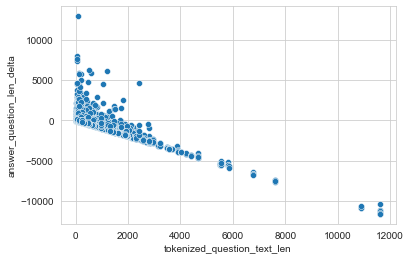

In [71]:
sns.scatterplot(data=full_hf_dataset_df,
                x='tokenized_question_text_len', y='answer_question_len_delta')

<Axes: xlabel='question_text_len_extra', ylabel='answer_text_len_extra'>

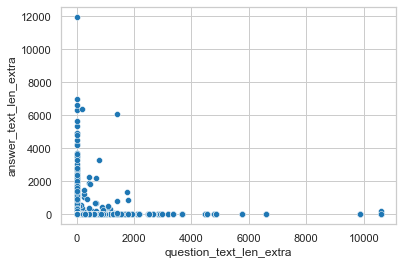

In [20]:
sns.scatterplot(data=full_hf_dataset_df,
                x='question_text_len_extra', y='answer_text_len_extra')

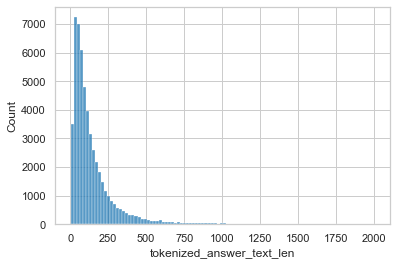

In [71]:
ax = sns.histplot(data=full_hf_dataset_df[full_hf_dataset_df['tokenized_answer_text_len'] <= 2048],
             x='tokenized_answer_text_len',
            bins=100)
ax.get_figure().savefig('outputs/images/tokenized_answer_len.pdf')

In [72]:
full_hf_dataset_df['tokenized_answer_text_len'].describe()

count    53263.000000
mean       153.416067
std        237.140817
min          2.000000
25%         50.000000
50%         94.000000
75%        177.000000
max      12990.000000
Name: tokenized_answer_text_len, dtype: float64

In [73]:
full_hf_dataset_df['tokenized_answer_text_len'].quantile(0.95)

458.0

In [50]:
tokenized_question_texts = pd.Series(full_hf_dataset_df['question_text'].unique()).apply(lambda x: tokenizer(x)['input_ids'])
tokenized_question_lens_df = pd.DataFrame({'tokenized_question_text_len': tokenized_question_texts.apply(len)})

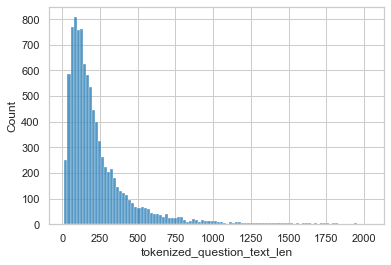

In [72]:
ax = sns.histplot(data=tokenized_question_lens_df[tokenized_question_lens_df['tokenized_question_text_len'] <= 2048],
             x='tokenized_question_text_len',
            bins=100)
ax.get_figure().savefig('outputs/images/tokenized_question_len.pdf')

In [52]:
tokenized_question_texts.apply(len).describe()

count     9721.000000
mean       259.174365
std        378.331916
min         14.000000
25%         95.000000
50%        166.000000
75%        292.000000
max      11625.000000
dtype: float64

In [53]:
tokenized_question_texts.apply(len).quantile(0.95)

744.0

#### Posts creation date

In [12]:
pd.to_datetime(dalip_dataset_df['CreationDate']).describe(datetime_is_numeric=True)

count                            62984
mean     2010-06-12 00:55:32.440079872
min                2008-08-03 11:50:33
25%         2009-07-24 16:30:17.500000
50%                2010-06-15 21:35:22
75%      2011-05-04 14:56:59.750000128
max                2012-03-14 01:22:07
Name: CreationDate, dtype: object

#### Intra-question scores distribution

In [6]:
from datasets import load_from_disk, concatenate_datasets
from src.utils.config_management import CONFIG
import pandas as pd
import seaborn as sns

In [24]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [7]:
hf_dataset = load_from_disk(CONFIG['paths']['data']['dalip_hf_dataset'])
full_hf_dataset = concatenate_datasets([hf_dataset['train'], hf_dataset['test']])
full_hf_dataset_df = pd.DataFrame(full_hf_dataset)
full_hf_dataset_df = full_hf_dataset_df.select_dtypes(exclude=['object'])

In [8]:
full_hf_dataset_df['answer_rank'] = full_hf_dataset_df.groupby('question_id')['answer_score'].rank(method='dense', ascending=False).astype(int)

In [9]:
full_hf_dataset_df.groupby('answer_rank')['answer_score'].describe()

,count,mean,std,min,25%,50%,75%,max
answer_rank,,,,,,,,
1,12217.0,6.005075,13.678552,0.0,2.00,3.0,6.0,505.0
2,16720.0,1.931340,5.465809,-4.0,0.00,1.0,2.0,269.0
3,12350.0,1.099676,3.180156,-7.0,0.00,0.0,1.0,137.0
4,6002.0,0.917194,3.008067,-9.0,0.00,0.0,1.0,95.0
5,2424.0,1.145215,3.689165,-7.0,0.00,0.0,1.0,91.0
6,1166.0,1.314751,3.626025,-7.0,0.00,0.0,1.0,53.0
7,690.0,1.443478,3.964336,-5.0,0.00,0.0,2.0,51.0
8,407.0,1.651106,4.417402,-16.0,0.00,1.0,2.0,44.0
9,259.0,1.868726,4.103098,-5.0,0.00,1.0,2.0,28.0


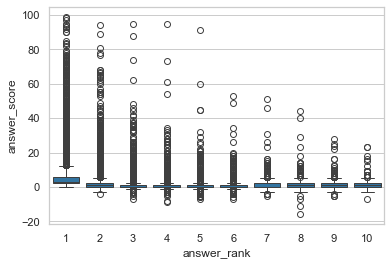

In [25]:
ax = sns.boxplot(data=full_hf_dataset_df[(full_hf_dataset_df['answer_rank'] <= 10) & (full_hf_dataset_df['answer_score'] <= 100)],
                 x='answer_rank', y='answer_score')
ax.get_figure().savefig('outputs/images/answer_scores_by_rank.pdf')

#### How many questions have accepted answers?

In [3]:
from datasets import load_from_disk, concatenate_datasets
from src.utils.config_management import CONFIG
import pandas as pd
import seaborn as sns

In [4]:
hf_dataset = load_from_disk(CONFIG['paths']['data']['dalip_hf_dataset'])
full_hf_dataset = concatenate_datasets([hf_dataset['train'], hf_dataset['test']])
full_hf_dataset_df = pd.DataFrame(full_hf_dataset)
full_hf_dataset_df = full_hf_dataset_df.select_dtypes(exclude=['object'])

In [5]:
full_hf_dataset_df.groupby('question_id')['answer_accepted'].sum().value_counts()

1    7489
0    2232
Name: answer_accepted, dtype: int64

#### Test dataset: answer scores within question

In [1]:
from src.utils.config_management import CONFIG
from datasets import load_from_disk
import pandas as pd
import numpy as np
from scipy.special import softmax
from scipy.stats import entropy

In [2]:
hf_dataset = load_from_disk(CONFIG['paths']['data']['dalip_hf_dataset'])
test_dataset_df = pd.DataFrame(hf_dataset['test'])
test_dataset_df['answer_rank'] = test_dataset_df.groupby('question_id')['answer_score'].rank(method='dense', ascending=False).astype(int)

In [3]:
test_questions_df = pd.DataFrame({'question_id': np.sort(test_dataset_df['question_id'].unique())})

In [4]:
test_questions_df['answer_scores_range'] = test_dataset_df.groupby('question_id')['answer_normalized_score'].agg(
    lambda x: x.max() - x.min()).values
test_questions_df['answer_scores_std'] = test_dataset_df.groupby('question_id')['answer_normalized_score'].std().values

In [5]:
def calculate_score_gaps(group, pct=False):
    group = group.sort_values('answer_normalized_score', ascending=False)

    if pct:
        gaps = group['answer_normalized_score'].pct_change(-1)
    else:
        gaps = group['answer_normalized_score'].diff(-1)

    return gaps[:4].tolist()

In [6]:
diff_gaps = test_dataset_df.groupby('question_id').apply(calculate_score_gaps, pct=False)
pct_gaps = test_dataset_df.groupby('question_id').apply(calculate_score_gaps, pct=True)

In [7]:
def create_gaps_df(gaps, gap_name):
    return pd.DataFrame(gaps.tolist(), columns=[f'{gap_name}_gap_{i}' for i in range(1, 5)], index=gaps.index)

In [8]:
diff_gaps_df = create_gaps_df(diff_gaps, 'diff')
pct_gaps_df = create_gaps_df(pct_gaps, 'pct')

test_questions_df = test_questions_df.join(diff_gaps_df, on='question_id')
test_questions_df = test_questions_df.join(pct_gaps_df, on='question_id')

In [29]:
def calculate_entropy(group, normalize=False):
    group = group.sort_values('answer_normalized_score', ascending=False)

    entropy_value = entropy(softmax(group['answer_normalized_score'][:4]))

    if normalize:
        maximum_entropy = np.log(4)
        return entropy_value / maximum_entropy
    else:
        return entropy_value

In [35]:
test_questions_df['answer_scores_entropy'] = test_dataset_df.groupby('question_id').apply(calculate_entropy, normalize=True).values

In [46]:
test_questions_df.describe()

,question_id,answer_scores_range,answer_scores_std,diff_gap_1,diff_gap_2,diff_gap_3,diff_gap_4,pct_gap_1,pct_gap_2,pct_gap_3,pct_gap_4,answer_scores_entropy
count,1.945000e+03,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1012.000000,1945.000000,1945.000000,1945.000000,1012.000000,1.945000e+03
mean,3.676443e+06,6.758355,2.613561,3.791260,1.493573,0.770694,0.581028,0.173825,0.078406,0.043967,0.032925,4.876552e-01
std,2.732398e+06,13.690705,4.353918,9.233016,3.368195,1.444040,1.321793,0.276121,0.143548,0.071631,0.057148,3.386092e-01
min,6.960000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.717926e-77
25%,1.260040e+06,2.000000,0.957427,1.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,1.475111e-01
50%,3.072421e+06,4.000000,1.567021,2.000000,1.000000,0.000000,0.000000,0.111111,0.058824,0.000000,0.000000,5.207514e-01
75%,5.861428e+06,7.000000,2.786874,4.000000,2.000000,1.000000,1.000000,0.200000,0.105263,0.062500,0.062500,7.635327e-01
max,9.692987e+06,230.000000,100.811706,180.000000,75.000000,22.000000,28.000000,3.578947,3.409091,0.789474,0.600000,1.000000e+00


In [45]:
test_questions_df.to_csv('data/dalip_stackoverflow_dataset/test_answer_scores_distribution.csv', index=False)

## Dalip results analysis

In [1]:
import pandas as pd
from src.utils.config_management import CONFIG
from src.evaluation import RankingEvaluator
from collections import defaultdict
import numpy as np

In [2]:
dalip_model_name = 'mv'

In [3]:
results_df = pd.read_csv(CONFIG['paths']['data'][f'dalip_stackoverflow_{dalip_model_name}_results'])
results_df.head()

,fold,id,qid,predictedResult,targetResult
0,0,458759,458721,0.957833,22.0
1,0,7258223,7258095,0.718945,16.0
2,0,212993,212860,1.114616,111.0
3,0,3473456,3473334,0.712420,16.0
4,0,2883626,2879420,0.792077,16.0


In [4]:
evaluator = RankingEvaluator(ndcg_k=list(range(1, 11)),
                             ndcg_gain_func='linear', ndcg_discount_func='logarithmic')

In [5]:
folds_metrics_df = []

for fold_n in range(5):
    fold_df = results_df[results_df['fold'] == fold_n]

    targets = fold_df['targetResult']
    predictions = fold_df['predictedResult']

    metrics = evaluator(targets, predictions, fold_df['qid'])
    metrics['fold'] = fold_n

    folds_metrics_df.append(metrics)

folds_metrics_df_mv_feat_mv = pd.DataFrame(folds_metrics_df)
folds_metrics_df_mv_feat_mv['model'] = 'mv_feat_mv'

In [77]:
folds_metrics_df = []

for fold_n in range(5):
    fold_df = results_df[results_df['fold'] == fold_n]

    targets = fold_df['targetResult']
    predictions = fold_df['predictedResult']

    metrics = evaluator(targets, predictions, fold_df['qid'])
    metrics['fold'] = fold_n

    folds_metrics_df.append(metrics)

folds_metrics_df_mv = pd.DataFrame(folds_metrics_df)
folds_metrics_df_mv['model'] = 'mv'

In [78]:
folds_metrics_df_mv.mean()

<ipython-input-78-acc790fce956>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  folds_metrics_df_mv.mean()


ndcg@1_g.linear_d.logarithmic      0.908620
ndcg@2_g.linear_d.logarithmic      0.934557
ndcg@3_g.linear_d.logarithmic      0.952068
ndcg@4_g.linear_d.logarithmic      0.965055
ndcg@5_g.linear_d.logarithmic      0.970911
ndcg@6_g.linear_d.logarithmic      0.973736
ndcg@7_g.linear_d.logarithmic      0.975199
ndcg@8_g.linear_d.logarithmic      0.976029
ndcg@9_g.linear_d.logarithmic      0.976508
ndcg@10_g.linear_d.logarithmic     0.976793
mae                               16.990574
fold                               2.000000
dtype: float64

In [72]:
folds_metrics_mean_df = pd.concat([folds_metrics_df_mv, folds_metrics_df_mv_feat_mv])

In [73]:
folds_metrics_mean_df

,ndcg@1_g.linear_d.logarithmic,ndcg@2_g.linear_d.logarithmic,ndcg@3_g.linear_d.logarithmic,ndcg@4_g.linear_d.logarithmic,ndcg@5_g.linear_d.logarithmic,ndcg@6_g.linear_d.logarithmic,ndcg@7_g.linear_d.logarithmic,ndcg@8_g.linear_d.logarithmic,ndcg@9_g.linear_d.logarithmic,ndcg@10_g.linear_d.logarithmic,mae,hit_rate@1,fold,model
0,0.916720,0.940118,0.956976,0.968047,0.973540,0.975808,0.977117,0.977884,0.978471,0.978841,17.685790,0.510540,0,mv
1,0.908505,0.933744,0.951165,0.964279,0.970582,0.973510,0.975010,0.975941,0.976422,0.976685,16.290749,0.476852,1,mv
2,0.901643,0.929408,0.948073,0.963035,0.968894,0.971696,0.973169,0.973943,0.974431,0.974725,17.359555,0.448560,2,mv
3,0.910709,0.936680,0.953864,0.966158,0.971949,0.975017,0.976432,0.977237,0.977582,0.977804,16.265490,0.467078,3,mv
4,0.905521,0.932838,0.950260,0.963756,0.969589,0.972649,0.974267,0.975139,0.975633,0.975911,17.351286,0.467078,4,mv
0,0.894206,0.918994,0.939008,0.955264,0.962952,0.966582,0.968631,0.969818,0.970570,0.971168,20.082100,0.394344,0,mv_feat_mv
1,0.890921,0.915456,0.935021,0.952770,0.960787,0.965200,0.967461,0.968742,0.969507,0.969998,19.972369,0.373971,1,mv_feat_mv
2,0.890801,0.915508,0.936031,0.953356,0.961186,0.965136,0.967647,0.968874,0.969610,0.970166,20.749873,0.366255,2,mv_feat_mv
3,0.895528,0.922122,0.941187,0.957094,0.964125,0.967919,0.969845,0.971024,0.971663,0.972141,19.930663,0.389403,3,mv_feat_mv
4,0.891002,0.916712,0.936621,0.953702,0.961744,0.965394,0.967736,0.968903,0.969447,0.969996,21.080119,0.398148,4,mv_feat_mv


In [5]:
fold_0_df = results_df[results_df['fold'] == 0]
targets = fold_0_df['targetResult']
predictions = fold_0_df['predictedResult']

### Log to WandB

In [118]:
import wandb

In [16]:
wandb_config = defaultdict(dict)

wandb_config['dalip']['model_name'] = dalip_model_name

In [17]:
run = wandb.init(
    project='dalip-stackoverflow-answer-ranking',
    config=wandb_config,
    tags=['dalip', 'baseline']
)

In [5]:
evaluator = RankingEvaluator(ndcg_k=list(range(1, 11)),
                             ndcg_gain_func='exponential', ndcg_discount_func='logarithmic')

In [19]:
metrics = evaluator(targets, predictions, fold_0_df['qid'])
metrics

{'ndcg@1_g.exponential_d.logarithmic': 0.5203912190034004,
 'ndcg@2_g.exponential_d.logarithmic': 0.6017593996727593,
 'ndcg@3_g.exponential_d.logarithmic': 0.6762408428616449,
 'ndcg@4_g.exponential_d.logarithmic': 0.742700439983459,
 'ndcg@5_g.exponential_d.logarithmic': 0.7693187415585254,
 'ndcg@6_g.exponential_d.logarithmic': 0.7804146708806871,
 'ndcg@7_g.exponential_d.logarithmic': 0.7860235063831869,
 'ndcg@8_g.exponential_d.logarithmic': 0.7882638198010732,
 'ndcg@9_g.exponential_d.logarithmic': 0.7896800370837948,
 'ndcg@10_g.exponential_d.logarithmic': 0.7907891111065651,
 'mae': 20.082100370597168,
 'hit_rate@1': 0.3943444730077121}

In [20]:
wandb.log(metrics)

In [21]:
predictions_df = pd.DataFrame()
predictions_df['answer_id'] = fold_0_df['id']
predictions_df['answer_normalized_score'] = fold_0_df['targetResult']
predictions_df['predicted_score'] = fold_0_df['predictedResult']

In [22]:
wandb.log({'predictions_table': wandb.Table(dataframe=predictions_df)})

In [23]:
run.finish()

hit_rate@1,▁
mae,▁
ndcg@10_g.exponential_d.logarithmic,▁
ndcg@1_g.exponential_d.logarithmic,▁
ndcg@2_g.exponential_d.logarithmic,▁
ndcg@3_g.exponential_d.logarithmic,▁
ndcg@4_g.exponential_d.logarithmic,▁
ndcg@5_g.exponential_d.logarithmic,▁
ndcg@6_g.exponential_d.logarithmic,▁
ndcg@7_g.exponential_d.logarithmic,▁
ndcg@8_g.exponential_d.logarithmic,▁


### Analyze NDCG variants

In [60]:
import seaborn as sns

In [63]:
sns.set_style('whitegrid')
sns.set_context('notebook')

cmap = sns.cubehelix_palette(reverse=True, as_cmap=True)

In [76]:
evaluator = RankingEvaluator(ndcg_k=list(range(1, 10)),
                             ndcg_gain_func='linear', ndcg_discount_func='logarithmic')

metrics_with_random_df = []

for frac in np.arange(0.0, 1.1, 0.1):
    predictions_with_random = predictions.copy()
    predictions_with_random[predictions.sample(frac=frac).index] = predictions.sample(frac=frac)
    metrics = evaluator(targets, predictions_with_random, fold_0_df['qid'])
    for metric_name in metrics:
        if 'ndcg' in metric_name:
            k = metric_name.split('@')[1][0]
            metrics_with_random_df.append({'random fraction': frac, 'k': k, 'NDCG@k': metrics[metric_name]})

metrics_with_random_df = pd.DataFrame(metrics_with_random_df)

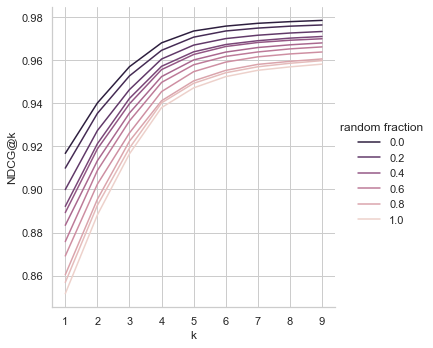

In [77]:
plot = sns.relplot(x='k', y='NDCG@k', hue='random fraction', data=metrics_with_random_df,
            kind='line', palette=cmap)
plot.savefig('outputs/images/ndcg_linear.pdf')

In [78]:
evaluator = RankingEvaluator(ndcg_k=list(range(1, 10)),
                             ndcg_gain_func='exponential', ndcg_discount_func='logarithmic')

metrics_with_random_df = []

for frac in np.arange(0.0, 1.1, 0.1):
    predictions_with_random = predictions.copy()
    predictions_with_random[predictions.sample(frac=frac).index] = predictions.sample(frac=frac)
    metrics = evaluator(targets, predictions_with_random, fold_0_df['qid'])
    for metric_name in metrics:
        if 'ndcg' in metric_name:
            k = metric_name.split('@')[1][0]
            metrics_with_random_df.append({'random fraction': frac, 'k': k, 'NDCG@k': metrics[metric_name]})

metrics_with_random_df = pd.DataFrame(metrics_with_random_df)

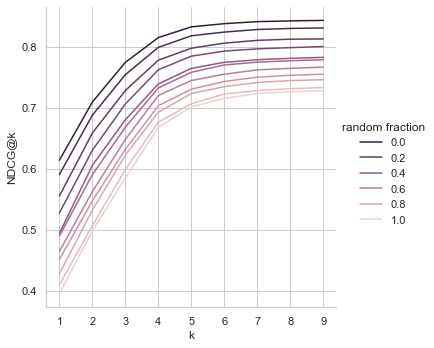

In [79]:
plot = sns.relplot(x='k', y='NDCG@k', hue='random fraction', data=metrics_with_random_df,
            kind='line', palette=cmap)
plot.savefig('outputs/images/ndcg_exponential.pdf')